# 1. Exploratory Data Analysis

In [1]:
# Import libraries

# Utilities
import pandas as pd
pd.options.display.max_colwidth = 300
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

%matplotlib inline

In [2]:
# Read Data File

df = pd.read_csv('winequality-white.csv')
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6


In [3]:
df.columns

## The dataset is unusable at this point due the values being only in one column. 
## The data will be processed in the next segment.

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

# 2. Data Processing

In [4]:
# Split the column 0 into individual columns

df[[
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    'quality'
]] = df.iloc[:,0].str.split(';', expand=True)

# Drop 1st & last column
df = df.drop(df.columns[[0,-1]], axis=1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9


# 3. Data Cleaning

In [5]:
# Finding NA values

df.isna().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [6]:
# Finding the data type

df.dtypes

## Conversion to float is required to do Regression

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
dtype: object

In [7]:
# Convert to best possible type 

df = df.astype({
    "fixed acidity": float, 
    "volatile acidity": float, 
    "citric acid": float, 
    "residual sugar": float, 
    "chlorides": float, 
    "free sulfur dioxide": float, 
    "total sulfur dioxide": float, 
    "density": float, 
    "pH": float, 
    "sulphates": float, 
    "alcohol": float,
    })

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

<AxesSubplot:>

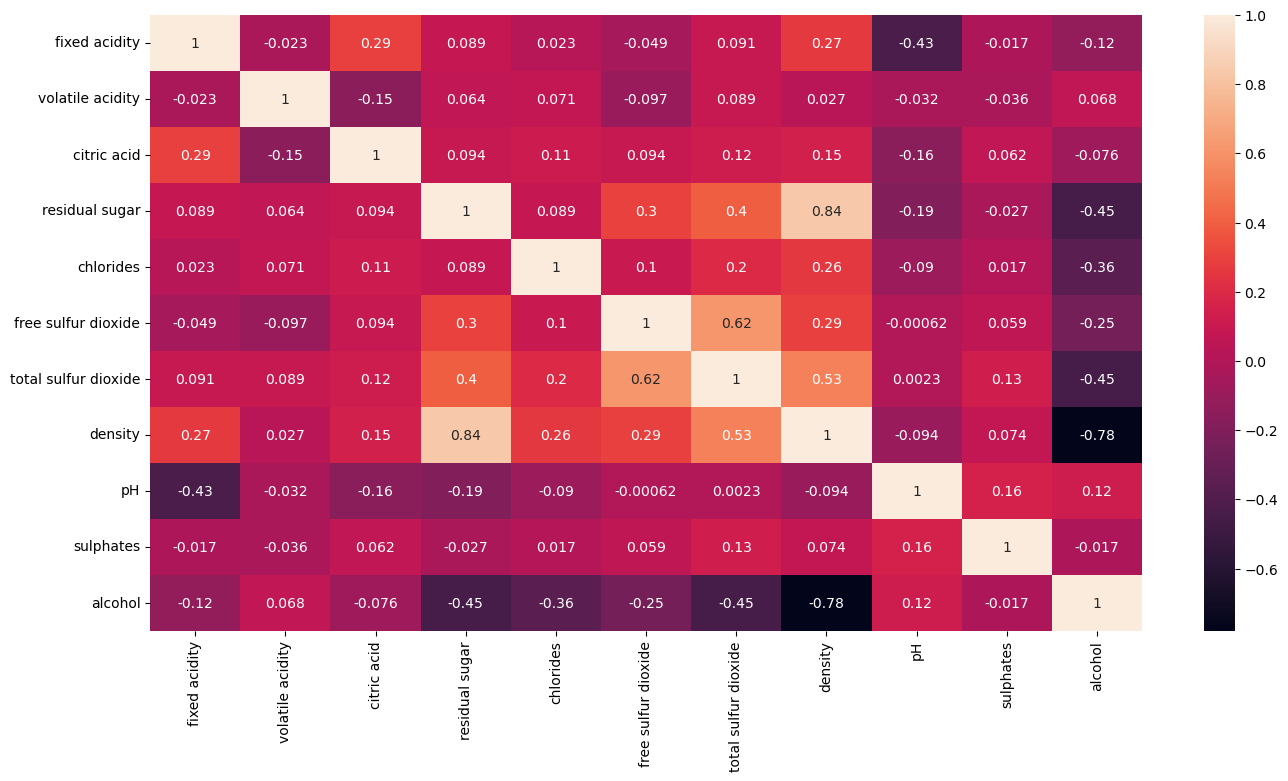

In [8]:
# Display correlation of data frame

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

# We will use SelectKbest to recommend the attributes that have an impact on wine quality.

# 4.1 Unsupervised - K-Means Clustering

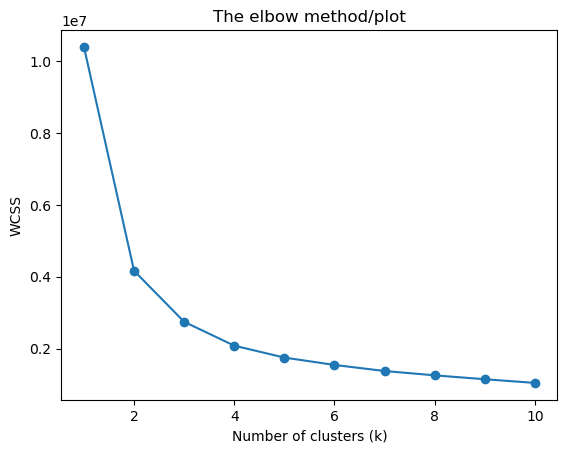

In [9]:
# Elbow method to find optimal K clusters

wcss = []
X = df

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# 3 is where the slope eases, thus to use 3 clusters

In [10]:
# Normalize data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [11]:
# Traning the model

kmeans = KMeans(n_clusters= 3)
kmeans_model = kmeans.fit(X_scaled) # Training the model on input data
labels=kmeans_model.labels_
labels

array([1, 2, 0, ..., 0, 2, 2])

In [12]:
# Tag each wine to a cluster

clusters=pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


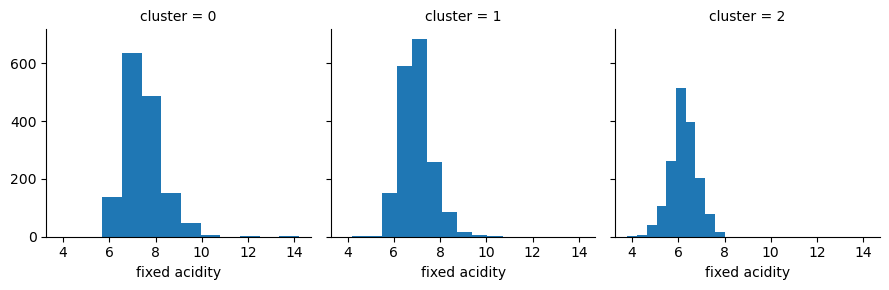

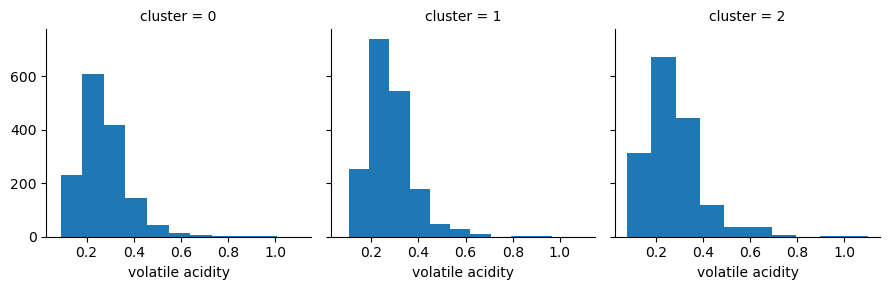

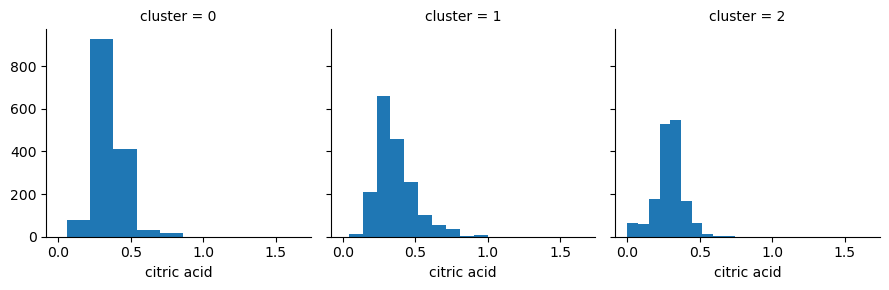

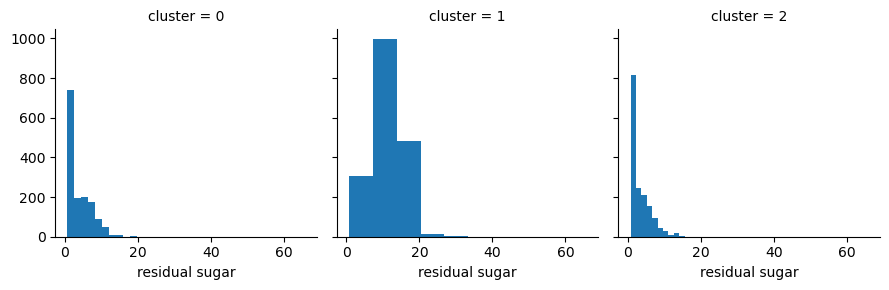

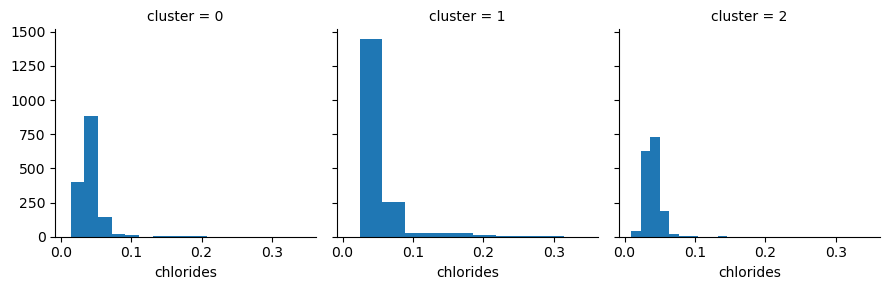

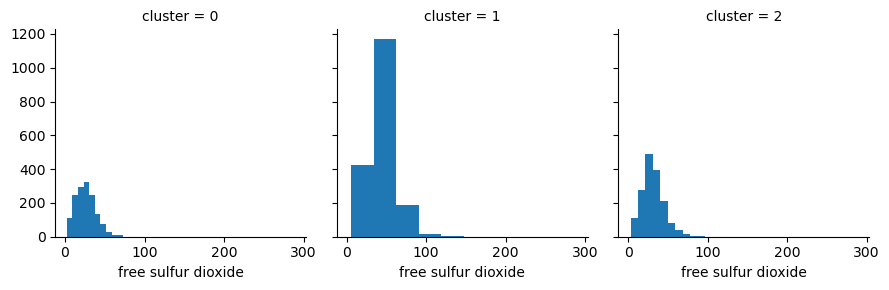

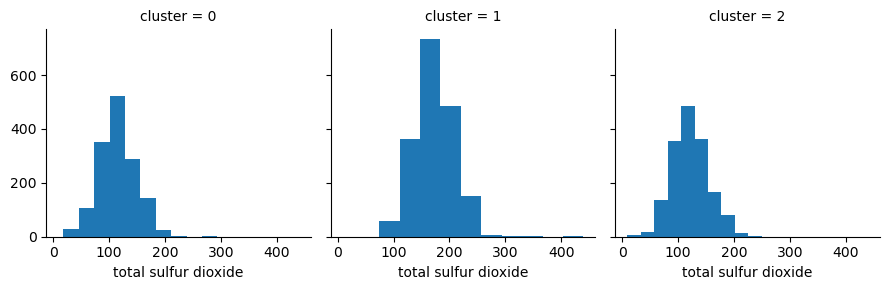

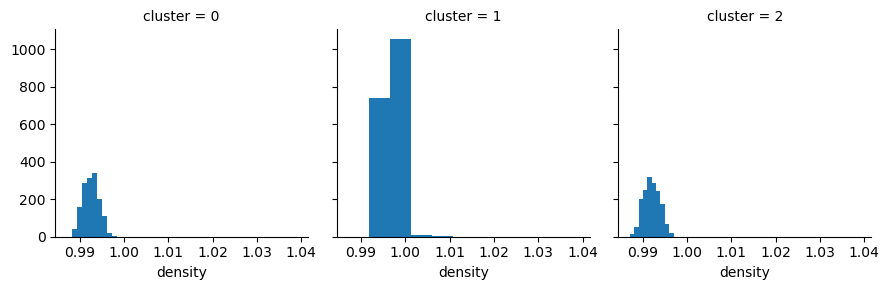

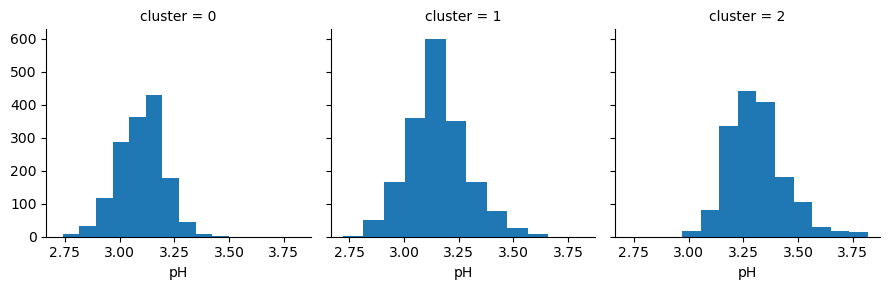

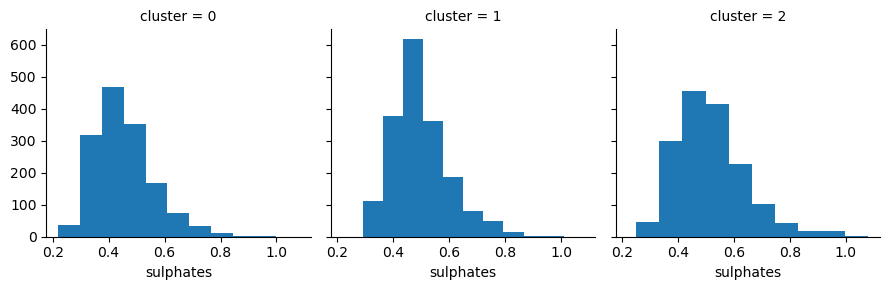

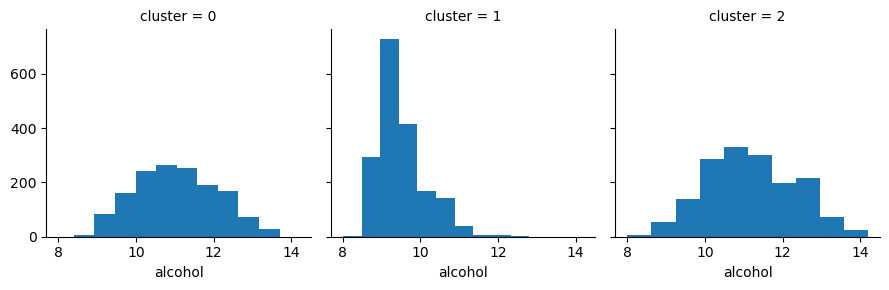

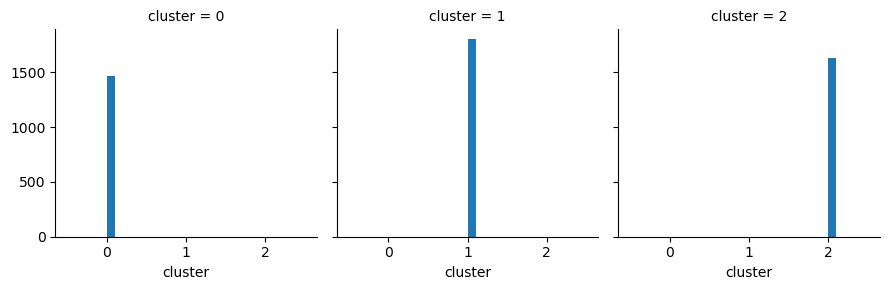

In [13]:
# Cluster intepretation

for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


• Cluster 0 = High Quality Wine  
• Cluster 1 = Mid Quality Wine  
• Cluster 2 = Low Quality Wine

### 4.1 K-Means Clustering Model Visualisation

In [14]:
dist = 1 - cosine_similarity(X_scaled)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(4898, 2)

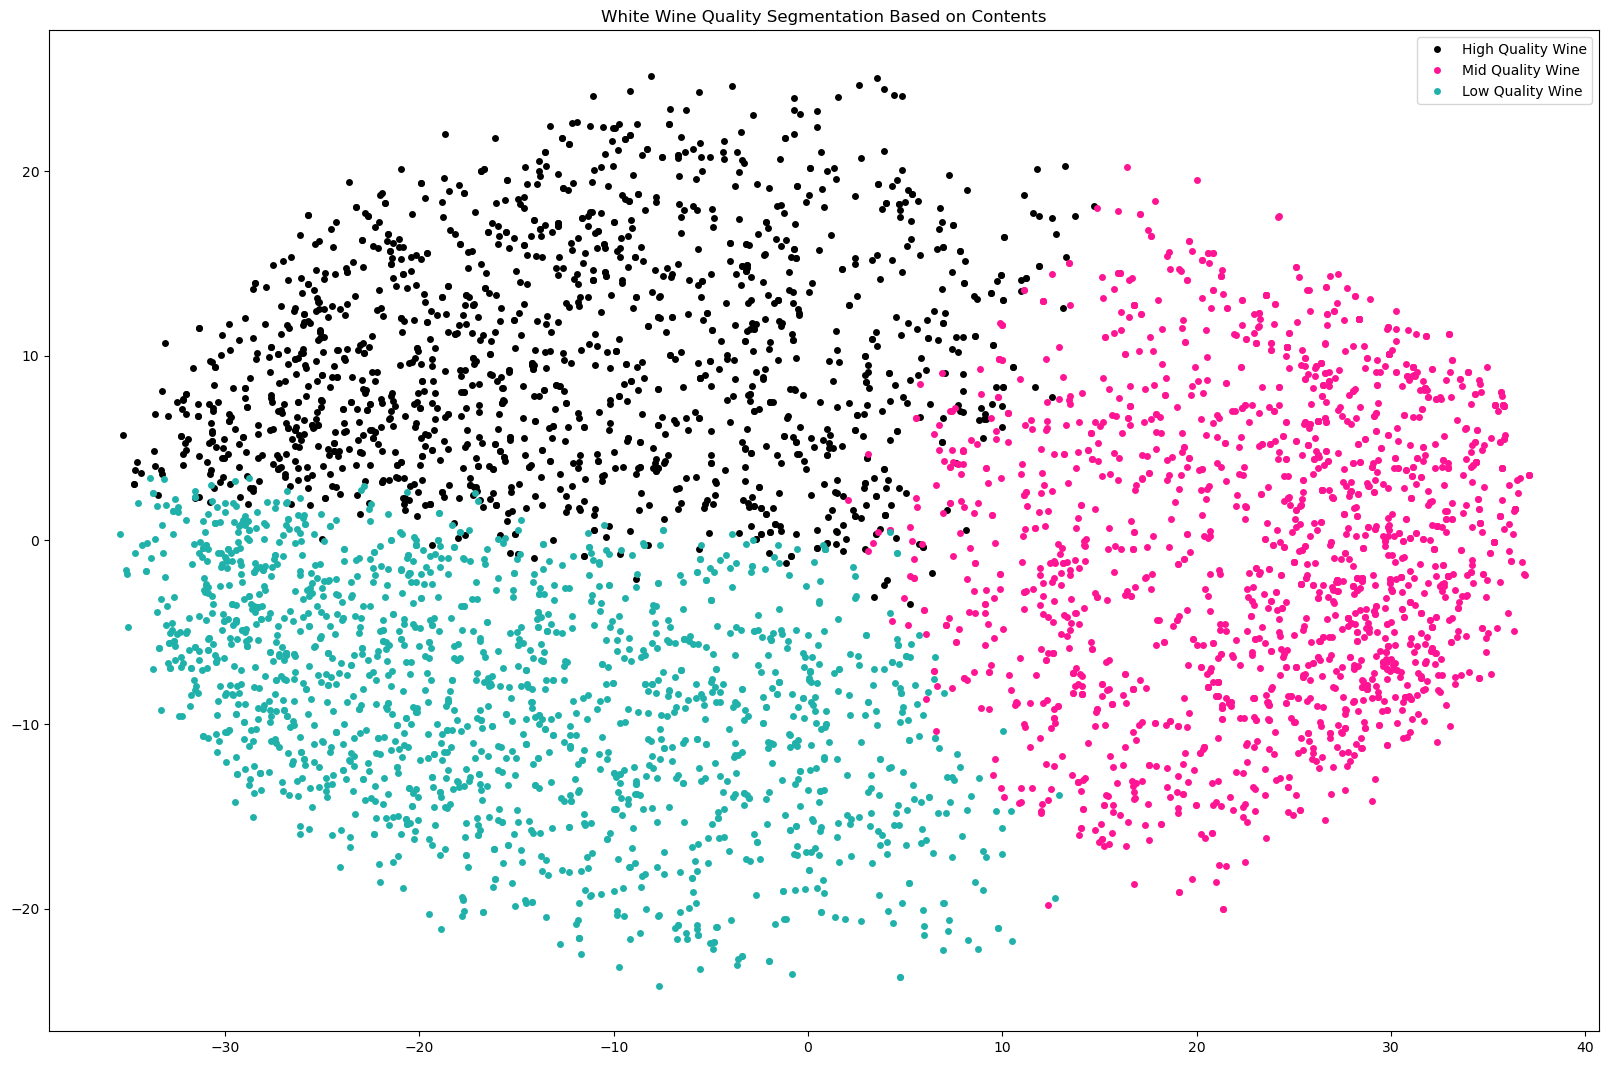

In [15]:
# Plotting the K Clustering

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'black',
          1: 'deeppink',
          2: 'lightseagreen',
         }

names = {0: 'High Quality Wine', 
         1: 'Mid Quality Wine', 
         2: 'Low Quality Wine', 
        }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')

ax.legend()
ax.set_title("White Wine Quality Segmentation Based on Contents")
plt.show()

# 4.2 Hierarchical Clustering

In [16]:
# Using 'Free Sulphur Dioxide' & 'Alcohol'

Y = X_scaled.iloc[:, [5,10]].values

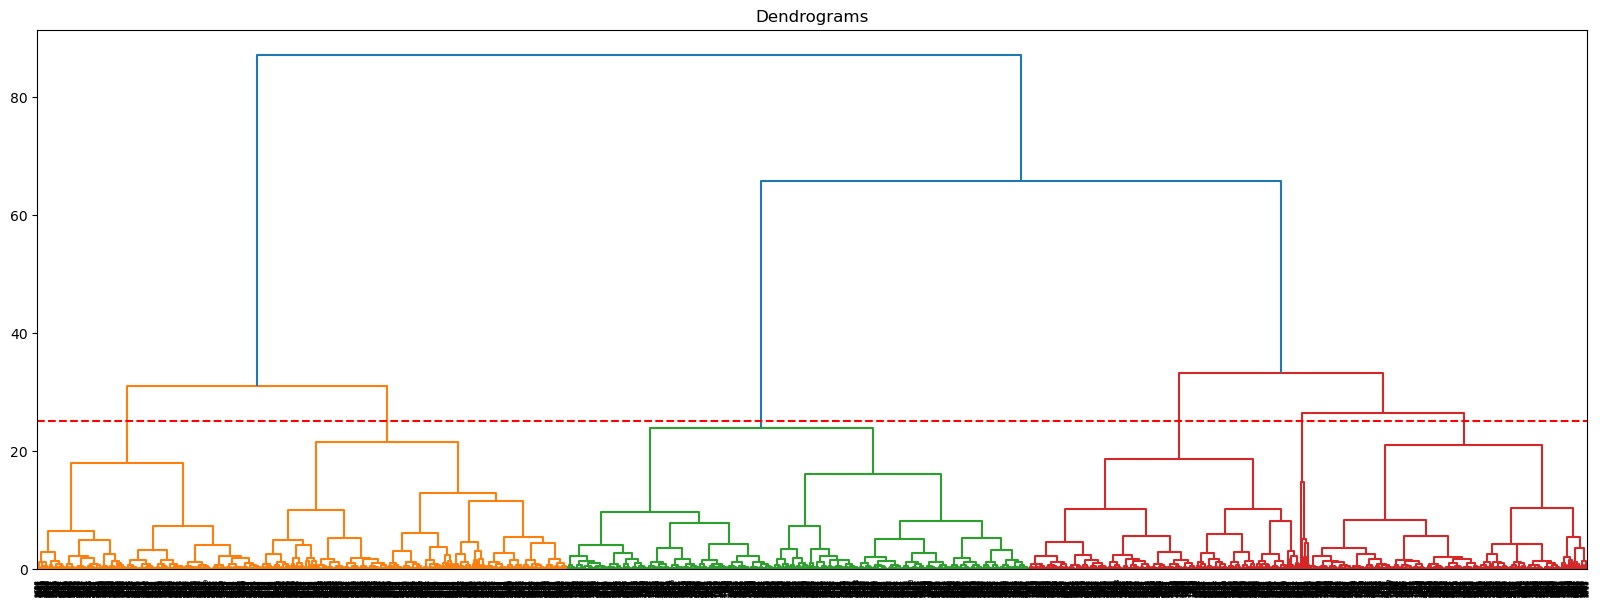

In [17]:
# make a dendrogram using ward method to find optimal clusters (Loading takes awhile)
plt.figure(figsize=(20, 7)) 
plt.title("Dendrograms") 

dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.axhline(y= 25, color='r', linestyle='--')

plt.show()

# 6 main clusters identified

In [18]:
# Model Training

hc= AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')

In [19]:
# Fitting and prediction

y_hc = hc.fit_predict(Y)
y_hc

array([2, 0, 0, ..., 0, 1, 1], dtype=int64)

### 4.2 Heirachical Model Visualisation

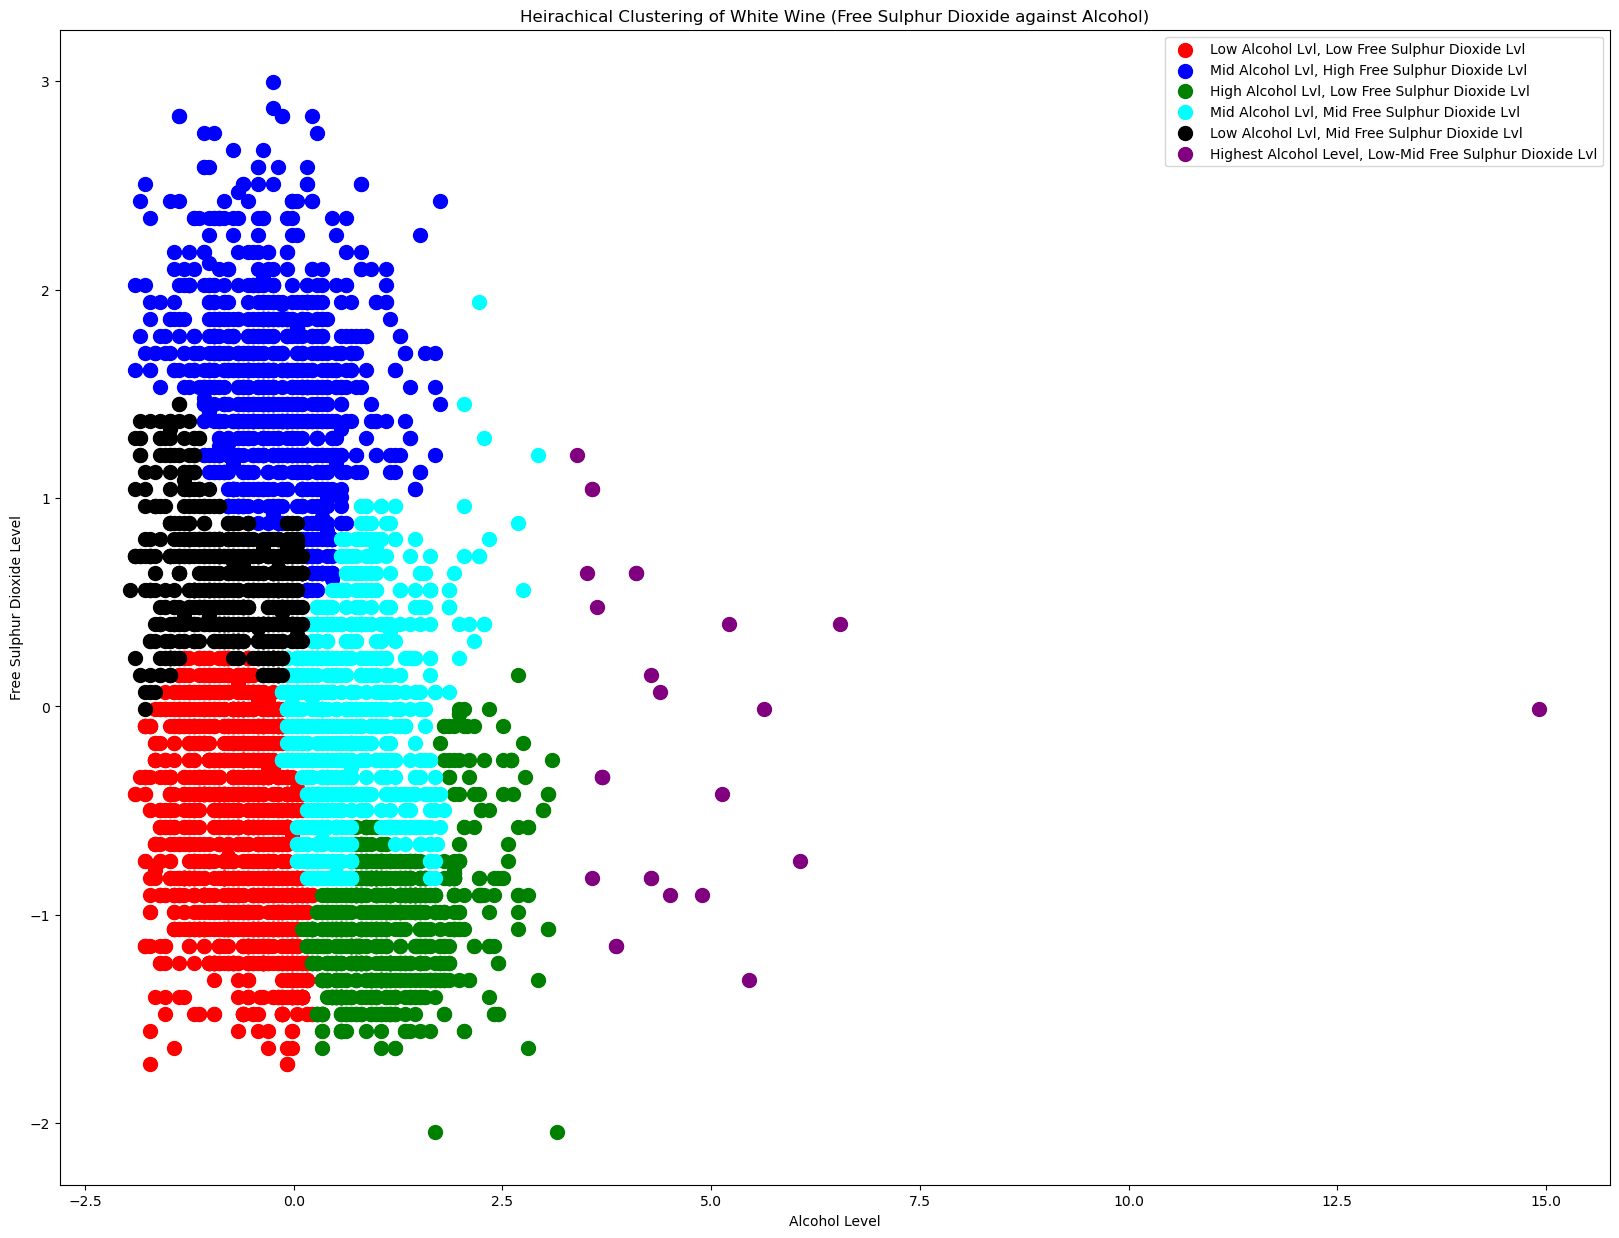

In [20]:
# Visualize the model

plt.figure(figsize=(20, 15))
plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], s=100, c='red', label = 'Low Alcohol Lvl, Low Free Sulphur Dioxide Lvl')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], s=100, c='blue', label = 'Mid Alcohol Lvl, High Free Sulphur Dioxide Lvl')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], s=100, c='green', label = 'High Alcohol Lvl, Low Free Sulphur Dioxide Lvl')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], s=100, c='cyan', label = 'Mid Alcohol Lvl, Mid Free Sulphur Dioxide Lvl')
plt.scatter(Y[y_hc == 4, 0], Y[y_hc == 4, 1], s=100, c='black', label = 'Low Alcohol Lvl, Mid Free Sulphur Dioxide Lvl')
plt.scatter(Y[y_hc == 5, 0], Y[y_hc == 5, 1], s=100, c='purple', label = 'Highest Alcohol Level, Low-Mid Free Sulphur Dioxide Lvl')
plt.title('Heirachical Clustering of White Wine (Free Sulphur Dioxide against Alcohol)')
plt.xlabel('Alcohol Level')
plt.ylabel('Free Sulphur Dioxide Level')
plt.legend(loc= 'upper right')
plt.show()